***Final Group Project (COMP6105)***<br/>
Kary Ng(p1404599)<br/>
Bryant Ho(p1604811)<br/>
Cyril Fong(p1604918)

Project: **Student Performance Classification Analysis**


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

# Pre-processing

***Load dataset***


In [50]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("https://raw.githubusercontent.com/dcuti8/data/main/student-mat.csv", sep=';')
por = pd.read_csv("https://raw.githubusercontent.com/dcuti8/data/main/student-por.csv", sep=';')

# merge datasets
df = pd.concat([mat,por])

In [51]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [52]:
df=df.drop(["period1_score","period2_score"],axis=1)

# convert final_score to categorical variable # Good:>14 Fair:10-14 Poor:0~10
df['final_grade'] = 'na'
df.loc[(df.final_score > 14) , 'final_grade'] = 'good' 
df.loc[(df.final_score > 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 10), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10,poor
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10,poor


In [53]:
#df.dtypes
#df.describe()
#checking for null values
#df.isnull().any()

***Data normalization***

In [54]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop(['final_score'], axis=1)#use final_grade as label

#data normalization
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)
dfd.school_support = le.fit_transform(dfd.school_support)
dfd.family_support = le.fit_transform(dfd.family_support)
dfd.paid_classes = le.fit_transform(dfd.paid_classes)
dfd.activities = le.fit_transform(dfd.activities)
dfd.nursery = le.fit_transform(dfd.nursery)
dfd.desire_higher_edu = le.fit_transform(dfd.desire_higher_edu)
dfd.internet = le.fit_transform(dfd.internet)
dfd.romantic = le.fit_transform(dfd.romantic)
dfd.school = le.fit_transform(dfd.school)
dfd.sex = le.fit_transform(dfd.sex)
dfd.address = le.fit_transform(dfd.address)
dfd.family_size = le.fit_transform(dfd.family_size)
dfd.parents_status = le.fit_transform(dfd.parents_status)
dfd.mother_job = le.fit_transform(dfd.mother_job)
dfd.father_job = le.fit_transform(dfd.father_job)
dfd.reason = le.fit_transform(dfd.reason)
dfd.guardian = le.fit_transform(dfd.guardian)

dfd.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,final_grade
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,2
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,2
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,2
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,2


In [55]:
#separate the input X and output label y
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade

# see total number of features
print(X.shape)

(1044, 30)


*EDA*

**1. Final Grade Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Student')

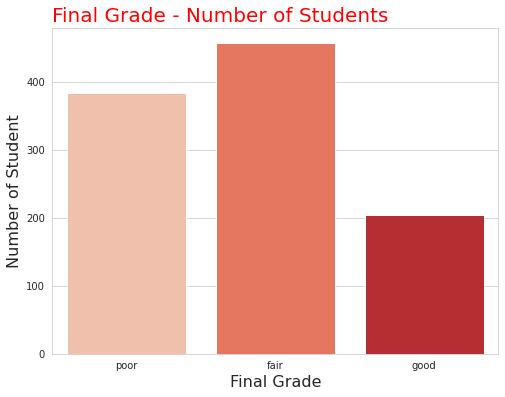

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Reds')
plt.title('Final Grade - Number of Students', loc="left", fontsize=20, color="Red")
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

**2. Correlation Heatmap**

Text(0.0, 1.0, 'Correlation Heatmap')

<Figure size 1080x864 with 0 Axes>

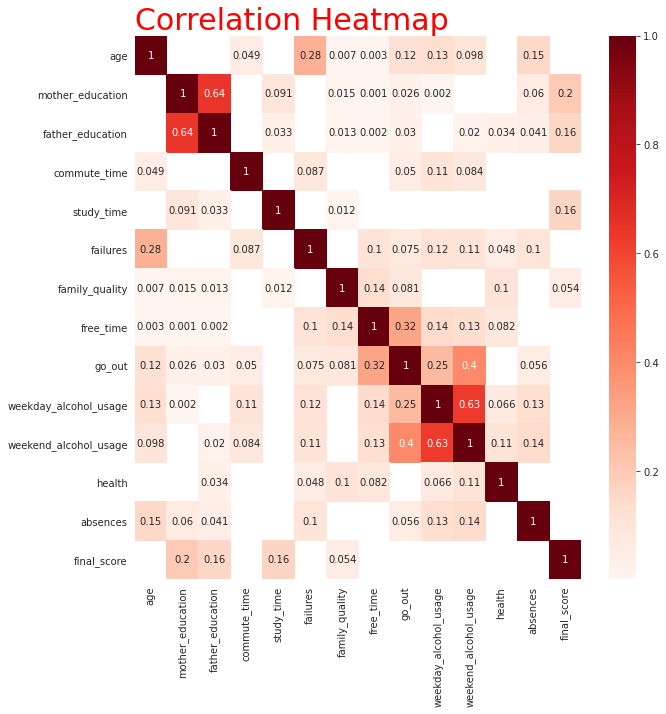

In [57]:
corr = (df.corr()).round(3)
corrA = np.squeeze(np.asarray(corr))
mask = np.zeros(df.corr().shape)
for i in range(14):
  for j in range(14):
    if corrA[i][j]<=0:
      mask[i][j]=1
plt.figure(figsize=(15,12))
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds", mask= mask )

plt.title('Correlation Heatmap',loc="left", fontsize=30, color="Red")

**3. Romantic Status**

<Figure size 432x288 with 0 Axes>

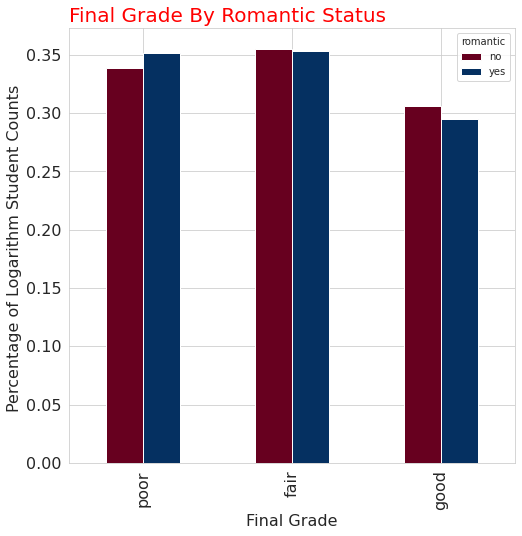

In [58]:
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)


plt.figure()
romance_perc.plot.bar(colormap="RdBu", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', loc="left", fontsize=20, color="Red")
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**4. Alcohol Consumption**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Level of Alcohol Consumption')

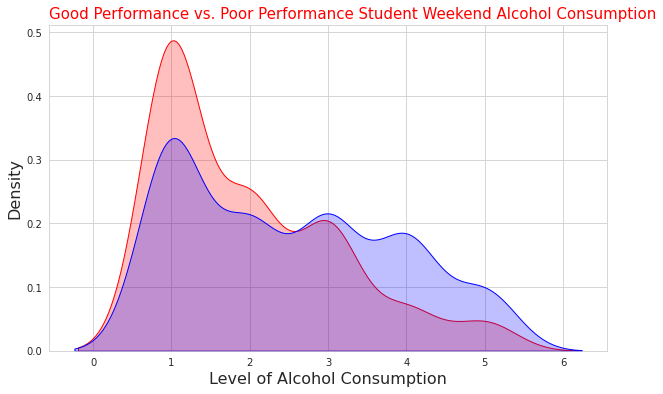

In [59]:
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)


good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage

poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption',  loc="left", fontsize=15, color="Red")
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

**5. Parents Education Level**

Text(0.5, 0, 'Father Education Level')

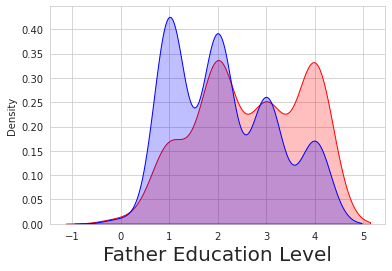

In [60]:
gfe = good.father_education
pfe = poor.father_education
gme = good.mother_education
pme = poor.mother_education

plt.figure(figsize=(6,4))
p2=sns.kdeplot(gfe, shade=True, color="r")
p2=sns.kdeplot(pfe, shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)


Text(0.5, 0, 'Mother Education Level')

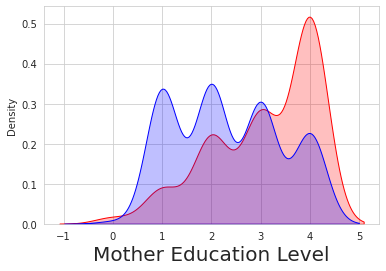

In [61]:
plt.figure(figsize=(6,4))
p3=sns.kdeplot(gme, shade=True, color="r")
p3=sns.kdeplot(pme, shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)

**6. Frequency Of Going Out**

Text(0.5, 0, 'Final Grade')

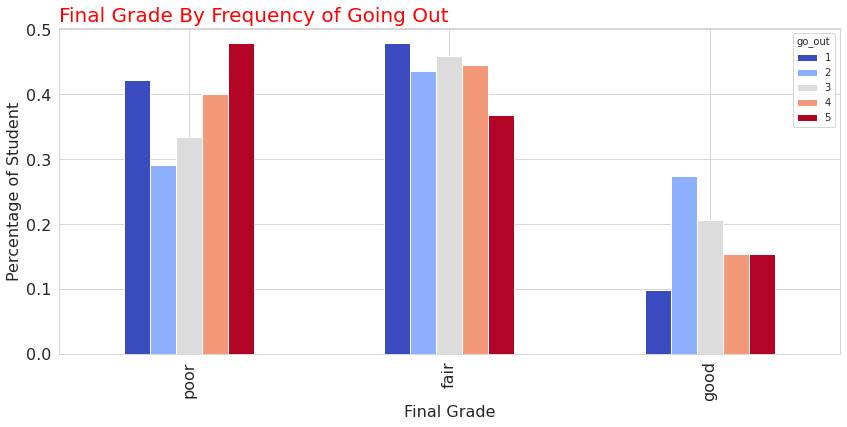

In [62]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="coolwarm", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', loc="left", fontsize=20, color="Red")
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

**7.Desire To Go To College**

Text(0.5, 49.99999999999995, 'Age')

<Figure size 864x576 with 0 Axes>

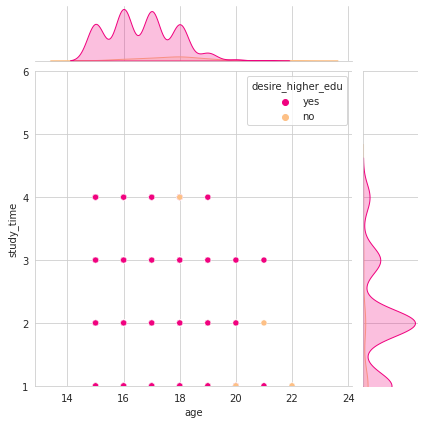

In [63]:
plt.figure(figsize=(12,8))
sns.jointplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

**8. Living Area**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


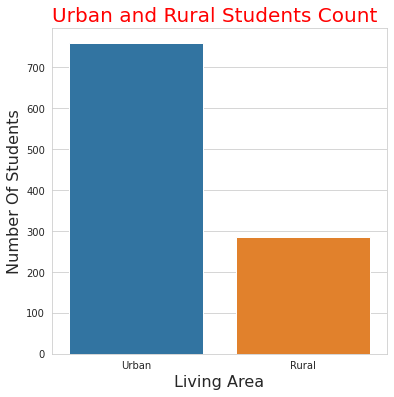

Text(0.5, 0, 'Final Grade')

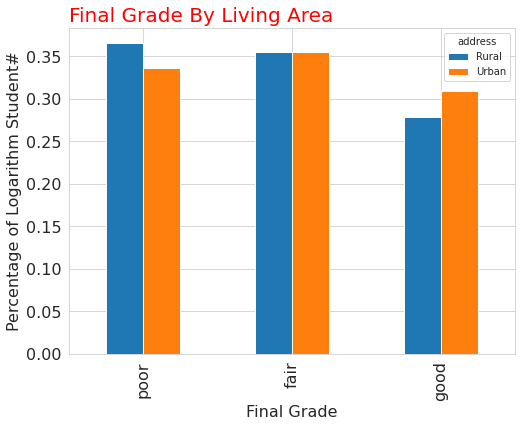

In [64]:
# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

# counting student living place
plt.figure(figsize=(6,6))
sns.countplot(df.address)
plt.title('Urban and Rural Students Count', loc="left", fontsize=20, color="Red")
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

# ploting the final_grade of student
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)
ad_perc.plot.bar(fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', loc="left", fontsize=20, color="Red")
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)


***Feature selection***

 1) parents_status                 0.011298
 2) internet                       0.015111
 3) nursery                        0.016092
 4) address                        0.016150
 5) school_support                 0.017522
 6) school                         0.018753
 7) family_size                    0.018823
 8) romantic                       0.018916
 9) family_support                 0.019184
10) desire_higher_edu              0.019204
11) activities                     0.020392
12) sex                            0.020468
13) guardian                       0.022606
14) weekday_alcohol_usage          0.025177
15) commute_time                   0.027487
16) father_job                     0.034202
17) family_quality                 0.036155
18) reason                         0.037069
19) study_time                     0.038871
20) paid_classes                   0.040849
21) mother_job                     0.041279
22) weekend_alcohol_usage          0.041985
23) mother_education            

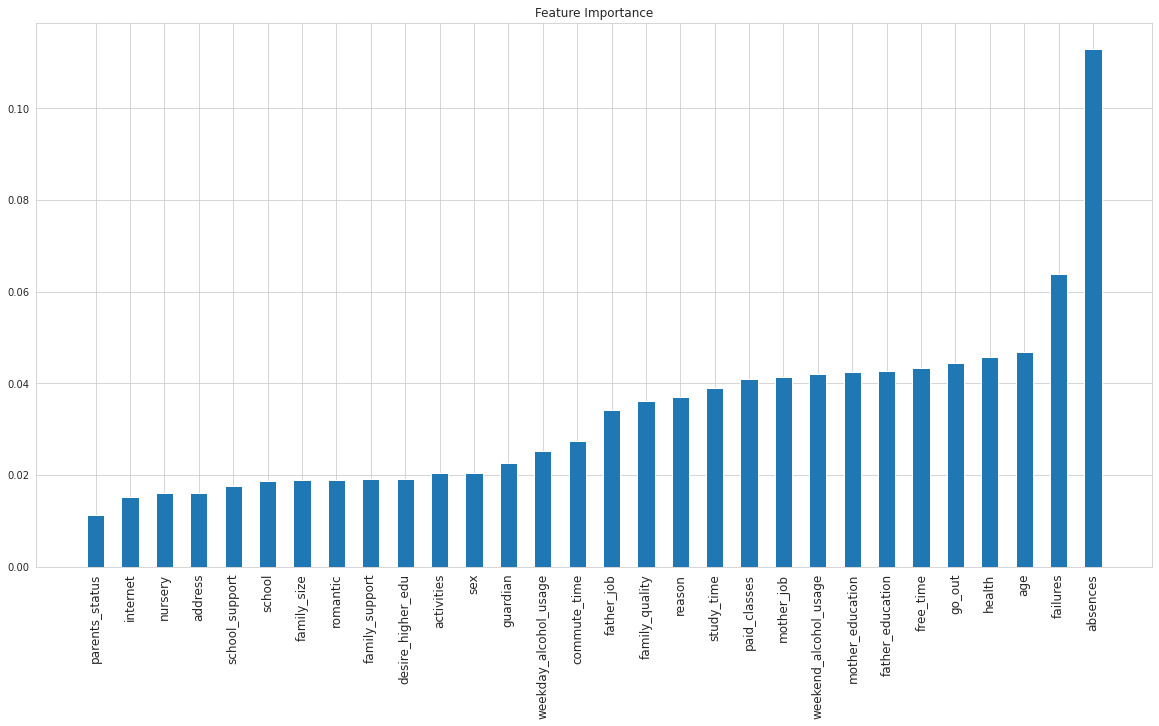

In [65]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(n_estimators=500,criterion="entropy",random_state=0)
# fit the model
model.fit(X, y)
# get importance
importances = model.feature_importances_

#sort importance feature
indices = np.argsort(importances)
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]
for f in range(X.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, names[f], importances[indices[f]]))

# Barplot: Add bars
plt.figure(figsize=(20,10))
plt.bar(range(X.shape[1]), importances[indices],width=0.5)
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]),names, rotation=90, fontsize = 12)
#from here we cam see that absences is the important features for determining the grades of students

plt.title("Feature Importance")
plt.show()

remove the unimportant feature from data

In [66]:
print("Original number of features:", len(X.columns[:]))
#get the importance feature
top_features = X.columns[:][importances>0.04]
print("After feature selection number of features:", len(top_features))
#remove the unimportant feature from data 
X_top = X[top_features]
X_top.head(5)

Original number of features: 30
After feature selection number of features: 11


,age,mother_education,father_education,mother_job,failures,paid_classes,free_time,go_out,weekend_alcohol_usage,health,absences
0,18,4,4,0,0,0,3,4,1,3,6
1,17,1,1,0,0,0,3,3,1,3,4
2,15,1,1,0,3,1,3,2,3,3,10
3,15,4,2,1,0,1,2,2,1,5,2
4,16,3,3,2,0,1,3,2,2,5,4


***Split dataset into train and test set***

In [67]:
#split dataset into train and test set
from sklearn.model_selection import train_test_split
print('whole dataset: ',X_top.shape)
X_train,X_test,y_train,y_test=train_test_split(X_top,y,test_size=0.3)
print('traning set: ',X_train.shape)
print('testing set: ',X_test.shape)

whole dataset:  (1044, 11)
traning set:  (730, 11)
testing set:  (314, 11)
